## Gradient Boosting Regression Approach

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Hyperparameter Tuning

### 1. Problem Statement

Build a prediction engine which predicts the price of vehicle based on various features like fuel type, mileage, number of cylinders, horsepower etc

In [1]:
# import modules
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### 2. Load data

In [2]:
df = pd.read_csv('data.csv')

### 3. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

**NOTE:** No null values are present, so we do not need to bother about them.

In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**NOTE:** Here, we can see some of the values are non-numeric. Let's have a look which column are numeric and which of them are non-numeric as model doesn't accept non-numeric data.

In [6]:
num_col = df.select_dtypes(include=np.number).columns

cat_col = df.select_dtypes(exclude=np.number).columns

print(f"Numerical Columns: {num_col.values}\n")
print(f"Categorical Columns: {cat_col.values}")

Numerical Columns: ['symboling' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginesize' 'boreratio' 'stroke' 'compressionratio' 'horsepower'
 'peakrpm' 'citympg' 'highwaympg' 'price']

Categorical Columns: ['make' 'fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'
 'enginelocation' 'enginetype' 'cylindernumber' 'fuelsystem']


**NOTE:** We need to convert these categorical columns into numerical form by using method like one-hot encoding.

### 4. Data pre-processing

In [7]:
df.drop(['make'], axis=1, inplace=True)

cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df = pd.get_dummies(df, cat_cols, drop_first=True)

In [8]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### 5. Exploratory Data Analysis(EDA)

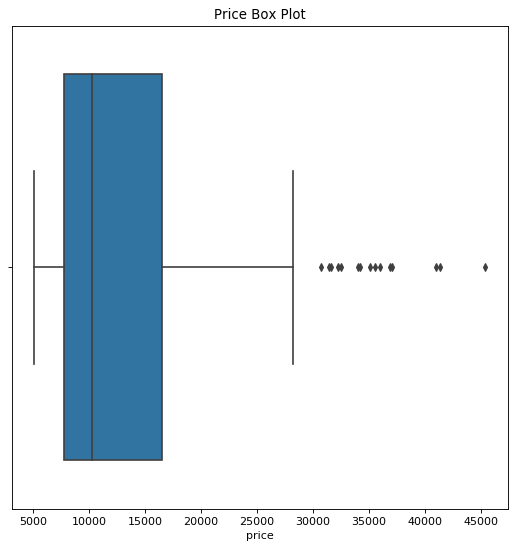

In [9]:
# Let's check the distribution of y variable i.e. `price`
plt.figure(figsize=(8, 8), dpi=80)
sns.boxplot(df['price'])
plt.title('Price Box Plot')
plt.show();

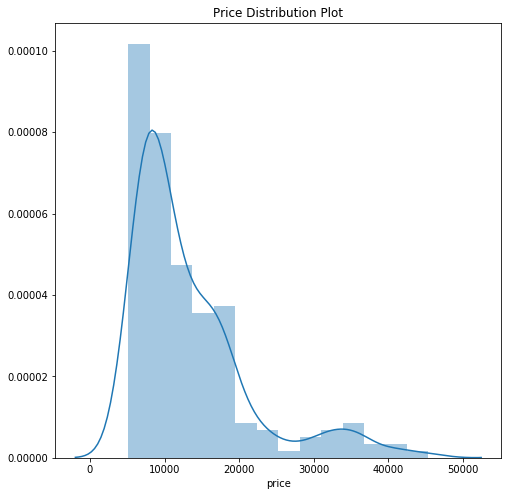

In [10]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['price']);

**NOTE:** The distribution of `price` is right skewed means mostly the price is around 10,000.

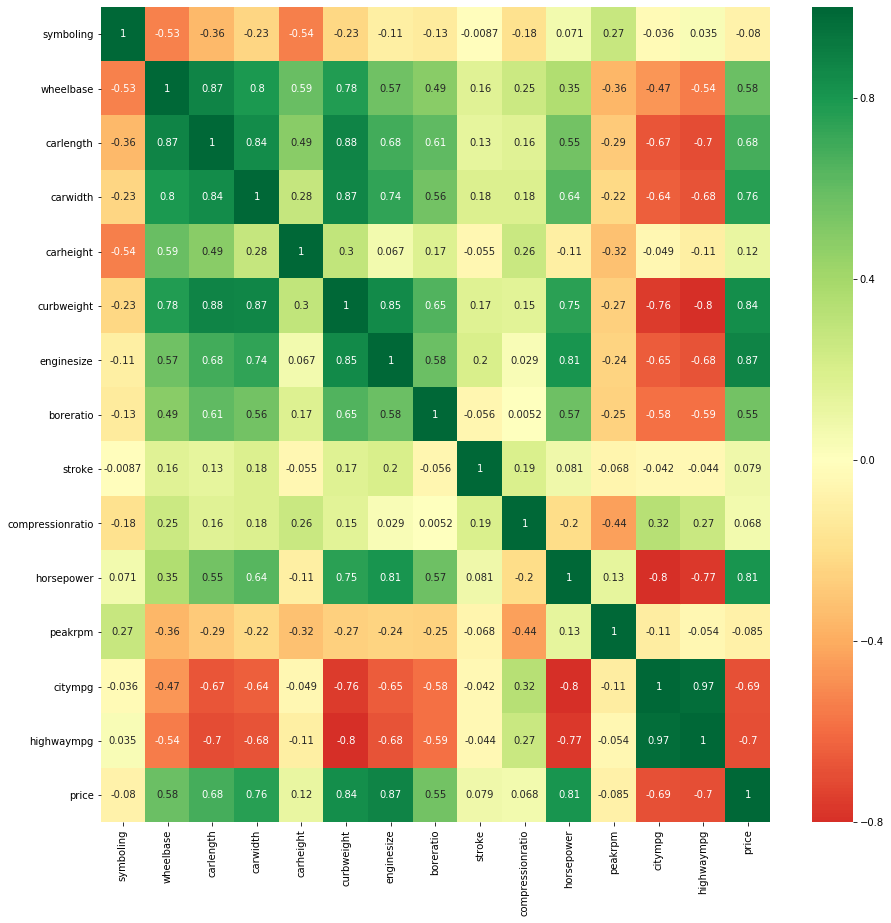

In [11]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
sns.heatmap(df[num_col].corr(), annot=True, cmap='RdYlGn', center=0);

### 6, 7. Model Building, Prediction and Evaluation

In [12]:
# Split the data into train and test set
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

In [13]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Gradient Boosting Regressor

* learning_rate = 0.05

In [14]:
# Intialialize the model and fit the data
reg = GradientBoostingRegressor(learning_rate=0.05, random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, random_state=0)

In [15]:
# predict prices
y_pred = reg.predict(X_test)

In [16]:
# evaluate the model
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")

R2 Score: 0.9000041518824436
Mean Absolute Percentage Error: 11.29590381197895


**NOTE:** MAPE is quite higher, so let us try to tune the paramtere again

#### Gradient Boosting Regressor

* learning_rate = 0.1

In [17]:
# Intialialize the model and fit the data
reg = GradientBoostingRegressor(learning_rate=0.1, random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [18]:
# predict prices
y_pred = reg.predict(X_test)

In [19]:
# evaluate the model
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")

R2 Score: 0.9032563276702824
Mean Absolute Percentage Error: 10.706222829651932


**NOTE:** MAPE has improved as compared to the previous model, let's again try tunning it using GridSearchCV.

### 8. Hyperparameter Tunning

#### GridSearchCV

In [22]:
reg_model = GradientBoostingRegressor(random_state=0)

# defining parameters 
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.2, 0.15, 0.1],
              'max_depth': [2, 3, 4, 6],
              'min_samples_leaf': [1, 3, 5]}

grid = GridSearchCV(reg_model, param_grid, refit=True, verbose=3)

In [23]:
# fit the data to model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100, score=0.926, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100, score=0.801, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100, score=0.883, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=100, score=0.947, total=   0.1s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.754, total=   0.2s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.924, total=   0.3s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.803, total=   0.3s
[CV] learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.887, total=   0.3s
[CV] le

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.794, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.928, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.865, total=   0.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.874, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.942, total=   0.3s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.794, total=   0.6s
[CV] 

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500, score=0.942, total=   0.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500, score=0.843, total=   0.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500, score=0.852, total=   0.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=500, score=0.948, total=   0.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.739, total=   0.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.942, total=   0.7s
[CV

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=500, score=0.874, total=   0.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=500, score=0.845, total=   0.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=500, score=0.923, total=   0.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.708, total=   0.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.928, total=   0.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.874, total=   0.9s
[

[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.883, total=   0.3s
[CV] learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=500 
[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=500, score=0.931, total=   0.3s
[CV] learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.787, total=   0.6s
[CV] learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.914, total=   0.5s
[CV] learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.777, total=   0.6s
[CV] learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.884, to

[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=500, score=0.946, total=   0.3s
[CV] learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.759, total=   0.7s
[CV] learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.931, total=   0.6s
[CV] learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.858, total=   0.7s
[CV] learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.862, total=   0.6s
[CV] learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.946, 

[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.688, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.945, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.862, total=   0.8s
[CV] learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.843, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.938, total=   0.7s
[CV] learning_rate=0.15, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.733, t

[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.928, total=   0.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.874, total=   0.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.849, total=   0.9s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=1, n_estimators=1000, score=0.926, total=   0.8s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=3, n_estimators=100, score=0.781, total=   0.1s
[CV] learning_rate=0.15, max_depth=6, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.15, max_depth=6, min_samples_leaf=3, n_estimators=100, score=0.933, tot

[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.793, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.880, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=1000, score=0.932, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100, score=0.925, total=   0.0s
[CV] learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=2, min_samples_leaf=3, n_estimators=100, score=0.802, total=   0.1s
[C

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.875, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=1000, score=0.937, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, score=0.804, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, score=0.935, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, score=0.829, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, n_estimators=100, score=0.883, total=   0.1s
[CV]

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=1000, score=0.942, total=   0.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.718, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.942, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.841, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.848, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.948, total=   0.1s
[CV] l

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=100, score=0.859, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=100, score=0.874, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=100, score=0.931, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500, score=0.789, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500, score=0.933, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, n_estimators=500, score=0.860, total=   0.4s
[CV] le

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  3.3min finished


GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.2, 0.15, 0.1],
                         'max_depth': [2, 3, 4, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [25]:
# best parameters after tunning
print(grid.best_params_)

print(grid.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 500}
GradientBoostingRegressor(learning_rate=0.2, n_estimators=500, random_state=0)


In [26]:
# predict using best parameters
grid_pred = grid.predict(X_test)

In [27]:
# evaulate the model
print(f"R2 Score: {r2_score(y_test, grid_pred)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, grid_pred)}")

R2 Score: 0.9139723557418868
MAPE Score: 10.737216706194735


**SUMMARY:** Our model has permormed well with tunned parameters.